# **FACE DETECTION AND CLASSIFICATION**

The objective of this project appears to be Face Recognition, which involves detecting, identifying, and verifying human faces using machine learning or deep learning techniques.

**Key Goals of the Project:**

1. Face Detection: Identifying and locating faces in an image or video.

2. Feature Extraction: Extracting key facial features for recognition.

3. Face Classification: Assigning detected faces to known identities or marking them as unknown.

# dataset link:
github repository:  https://github.com/sanjanathammayya/Face_Detection_Classification_MA

kaggle dataset link : https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/code

****************************************************************************************************************************************************************

Absolutely! Here's a **very short and simple explanation** of each block:

---

### 🔹 **PyTorch Core**
- `torch`: Main PyTorch library.
- `nn`: Build neural networks.
- `optim`: Train the model (optimizers).
- `DataLoader`: Load data in batches.

---

### 🔹 **TorchVision (Images)**
- `datasets`, `transforms`: Load & prepare image data.
- `ImageFolder`: Load your own image folders (each folder = one class).

---

### 🔹 **Model Summary**
- `torchinfo`: Show model layers and parameters.

---

### 🔹 **Plotting & Math**
- `numpy`: Work with numbers/arrays.
- `matplotlib.pyplot`: Plot graphs or show images.
- `seaborn`: Pretty graphs (like heatmaps).

---

### 🔹 **Evaluation**
- `classification_report`, `confusion_matrix`: Check how well your model performs.

---



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchinfo
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Sure! Here's the **short version in points**:

- Checks if a **GPU is available**.
- Uses **GPU if available**, otherwise uses **CPU**.
- Prints which device is being used.
- Helps our code run **faster automatically** by using the best hardware.

In [ ]:
# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")

Using device: cuda
Number of GPUs: 2
Current GPU: 0
GPU name: NVIDIA A100 80GB PCIe


# **Purpose of the Code**

1. To perform EDA (Exploratory Data Analysis).

2. It checks how many images are there per emotion category in the training and test folders.

Then, it visualizes those counts using a bar chart.

********************************************************************************

# 1. Import Libraries
os: Lets you work with folders and files (like counting files).

matplotlib.pyplot: Used to draw charts.

seaborn: A better-looking plotting library (used with matplotlib).

********************************************************************************
# 2. Set Dataset Folder Paths

Tells the code where to find:

Training images (inside the train/ folder).

Test/validation images (inside the validation/ folder).

********************************************************************************

# 3. Get Emotion Categories
Lists all subfolder names in the training folder.

Each subfolder represents one emotion label (like happy, sad, angry, etc.).

sorted() organizes them alphabetically.

Counts how many images are inside each emotion folder.

Does this for both training and test folders.

*************************************************************
# 4. Count Images per Emotion
 Counts how many images are inside each emotion folder.

Does this for both training and test folders.

********************
# 5. Calculate Total Images

Adds up all image counts:

Total for training set : 28821

Total for test set : 7066

Combined total : 35887

**********************
# 6. Create Bar Chart
Draws a bar chart showing image counts for each emotion.

Blue bars = Training set

Red bars = Test set

Helps visually compare how many images are available per class.
********************
# 7. Add Numbers on Bars

Adds the exact number of images on top of each bar.

Makes the graph more informative.

*********************
# 8. Label & Show the Plot

displays the chart.



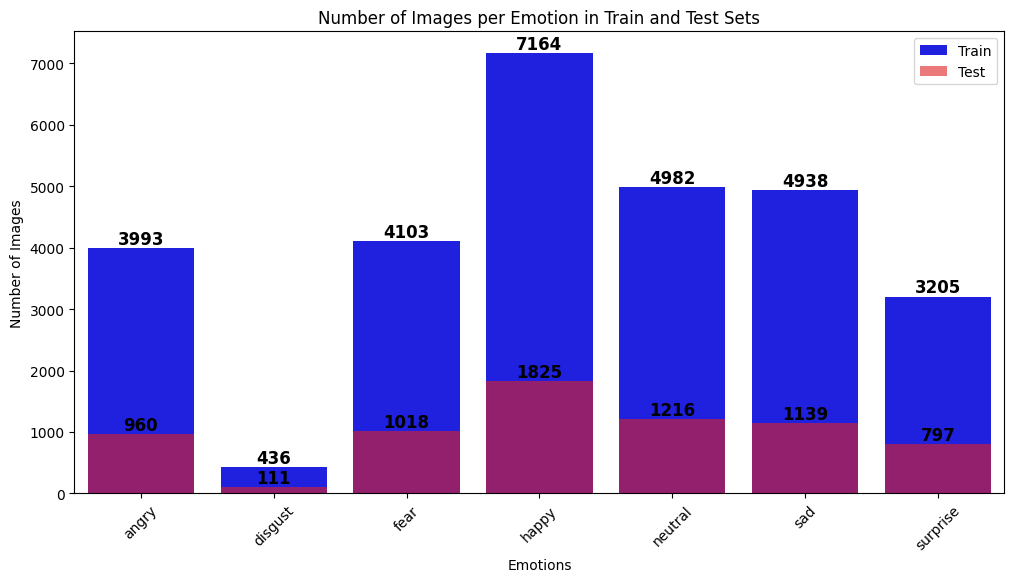

Total train images: 28821
Total test images: 7066
Total images in dataset: 35887


In [ ]:
#EDA
import os
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = "train"
test_dir = "validation"

# Get emotion categories
emotions = sorted(os.listdir(train_dir))

# Count images per emotion in train and test sets
train_counts = {emotion: len(os.listdir(os.path.join(train_dir, emotion))) for emotion in emotions}
test_counts = {emotion: len(os.listdir(os.path.join(test_dir, emotion))) for emotion in emotions}

total_train = sum(train_counts.values())
total_test = sum(test_counts.values())
total_images = total_train + total_test

# Plot the counts
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), color="blue", label="Train")
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), color="red", alpha=0.6, label="Test")

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xlabel("Emotions")
plt.ylabel("Number of Images")
plt.title("Number of Images per Emotion in Train and Test Sets")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print total image counts
print(f"Total train images: {total_train}")
print(f"Total test images: {total_test}")
print(f"Total images in dataset: {total_images}")



---

- **`RANDOM_STATE = 42`**  
  → Used to get the **same result every time** you run the code.  
  (Helps in debugging and testing.)

---

- **`IMAGE_SHAPE = (48, 48)`**  
  → All images will be **resized to 48x48 pixels** before training.  
  (So they are all the same size.)

---

- **`EPOCHS = 300`**  
  → The model will train for **300 full rounds** through the dataset.  
  (More epochs = more learning, but training takes longer.)

---

- **`BATCH_SIZE = 16`**  
  → The model will look at **16 images at a time** during training.  
  (Small batch = less memory used.)

---

- **`NUM_CLASSES = 7`**  
  → There are **7 emotion categories** (like happy, sad, angry, etc.).  
  (The model will learn to pick one out of these 7.)

---

- **`train_path = 'train'`**  
  → Folder name where **training images** are stored.

---

- **`test_path = 'validation'`**  
  → Folder name where **test/validation images** are stored.

---


In [ ]:
# Constants
RANDOM_STATE = 42
IMAGE_SHAPE = (48, 48)
EPOCHS = 300
BATCH_SIZE = 16
NUM_CLASSES = 7
train_path = 'train'
test_path = 'validation'

**Training: Uses random changes to make the model strong.**

**Testing: Clean and consistent — to check real performance.**



---

### 🔹 **Training Transformations (`train_transform`)**

These steps are applied to training images to improve learning:

1. **Convert to Grayscale**  
   → `transforms.Grayscale(num_output_channels=1)`  
   → Changes colored image to black & white (1 channel only).

2. **Resize the Image**  
   → `transforms.Resize(IMAGE_SHAPE)`  
   → Makes all images the same size: 48x48 pixels.

3. **Random Rotation**  
   → `transforms.RandomRotation(15)`  
   → Rotates the image randomly by up to 15 degrees.

4. **Random Horizontal Flip**  
   → `transforms.RandomHorizontalFlip()`  
   → Flips the image left-to-right randomly.

5. **Color Jitter**  
   → `transforms.ColorJitter(brightness=0.1, contrast=0.1)`  
   → Slightly changes brightness and contrast.

6. **Convert to Tensor**  
   → `transforms.ToTensor()`  
   → Converts the image into a format PyTorch understands.

7. **Normalize**  
   → `transforms.Normalize([0.5], [0.5])`  
   → Scales pixel values from [0, 1] to [-1, 1].

---

### 🔸 **Testing Transformations (`test_transform`)**

These are simpler — used for test/validation images only:

1. **Convert to Grayscale**  
   → Black & white image (1 channel).

2. **Resize**  
   → All images to 48x48 pixels.

3. **Convert to Tensor**  
   → So PyTorch can process it.

4. **Normalize**  
   → Pixel values scaled to [-1, 1].

---


In [ ]:
# Data transformations
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(IMAGE_SHAPE),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(IMAGE_SHAPE),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])



1. **Load Training and Test Datasets**:
   - `train_dataset = ImageFolder(root=train_path, transform=train_transform)`  
     - Loads training images from `train_path` with specified transformations.
   
   - `test_dataset = ImageFolder(root=test_path, transform=test_transform)`  
     - Loads test images from `test_path` with transformations.

2. **Split Training Data into Train and Validation Sets**:
   - `train_size = int(0.8 * len(train_dataset))`  
     - 80% of the data is used for training.
   
   - `val_size = len(train_dataset) - train_size`  
     - The remaining 20% is used for validation.

   - `train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(RANDOM_STATE))`  
     - Splits the training data into two sets: 80% for training, 20% for validation, with a fixed random seed for reproducibility.


In [ ]:
# Load datasets
train_dataset = ImageFolder(root=train_path, transform=train_transform)
test_dataset = ImageFolder(root=test_path, transform=test_transform)

# Split training data into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    train_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(RANDOM_STATE)
)



1. **Get Class Names**:
   - `classes = train_dataset.dataset.classes`  
     - This fetches the list of class names from the training dataset (e.g., ['cat', 'dog']).
   
   - `print(f"Classes: {classes}")`  
     - Prints the class names.

2. **Compute Class Weights for Handling Imbalanced Data**:
   - `class_counts = [0] * NUM_CLASSES`  
     - Initializes a list `class_counts` to store the number of samples in each class (with `NUM_CLASSES` being the total number of classes).
   
   - `for _, label in train_dataset:`  
     - Loops through each image in the training dataset, where `_` is the image and `label` is the corresponding class label.

   - `class_counts[label] += 1`  
     - Increments the count for the respective class label.

   - `total_samples = sum(class_counts)`  
     - Calculates the total number of samples in the dataset.

   - `class_weights = [total_samples / (len(class_counts) * count) for count in class_counts]`  
     - Computes the weight for each class. Classes with fewer samples will have higher weights to balance the data.

   - `class_weights = torch.FloatTensor(class_weights).to(device)`  
     - Converts the class weights to a PyTorch tensor and moves it to the specified device (CPU or GPU).

   - `print(f"Class weights: {class_weights}")`  
     - Prints the computed class weights.

### Why Class Weights?
Class weights are used to handle imbalanced data, giving more importance to minority classes during training, which helps improve model performance for those classes.

In [ ]:
# Get class names
classes = train_dataset.dataset.classes
print(f"Classes: {classes}")

# Compute class weights for handling imbalanced data
class_counts = [0] * NUM_CLASSES
for _, label in train_dataset:
    class_counts[label] += 1

total_samples = sum(class_counts)
class_weights = [total_samples / (len(class_counts) * count) for count in class_counts]
class_weights = torch.FloatTensor(class_weights).to(device)
print(f"Class weights: {class_weights}")

Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Class weights: tensor([1.0420, 9.7736, 1.0033, 0.5762, 0.8238, 0.8245, 1.2836],
       device='cuda:0')


# Model Flow:
1. Input: An image (like a 48x48 grayscale image).

2. Convolution Layers: Look for important features in the image.

3. Global Pooling: Compresses the features into a smaller form.

4. Fully Connected Layers: Makes the final decision about the class (emotion) of the image.

5. Dropout: Prevents the model from overfitting by randomly disabling some neurons.

Here’s a simpler breakdown of the **EmotionCNN** model:

### 1. **Convolutional Layers**:
   - These layers look for patterns in the image (like edges or shapes).
   - **ReLU**: Adds non-linearity to help the model learn better.
   - **Batch Normalization**: Makes the training process smoother.
   - **Max Pooling**: Shrinks the image size while keeping important details.
   - **Dropout**: Prevents the model from memorizing the data (overfitting).

### 2. **Global Average Pooling**:
   - This step reduces the image to a single value per feature, making the model focus on overall patterns instead of specific details.

### 3. **Fully Connected (FC) Layers**:
   - After feature extraction, the model makes predictions by combining the features into a final decision.
   - **Linear Layer**: Maps the features to emotion classes (like happy, sad, angry).
   - **Dropout**: Again helps prevent overfitting.

### 4. **Model Initialization**:
   - The model is set up with a specific number of emotion classes and moved to the correct device (CPU/GPU).

### 5. **Model Summary**:
   - **`torchinfo.summary()`** shows the model’s architecture and the number of parameters at each step.

### **In Simple Terms**:
- The **convolutional layers** find important patterns in the image.
- **Global pooling** reduces the image size to focus on important features.
- **Fully connected layers** predict the emotion based on the features found.
- **Dropout** helps prevent overfitting by randomly "turning off" some neurons during training.

This is a typical CNN model used for image classification tasks like recognizing emotions from images!

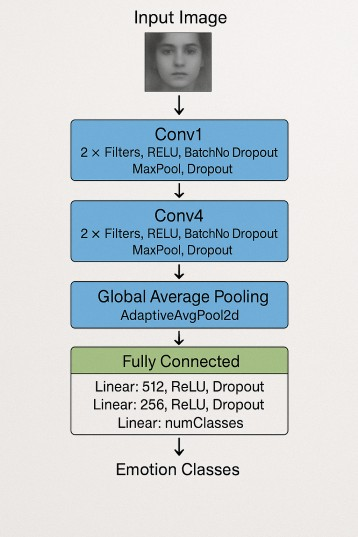

In [ ]:
class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # Layer 1: 32 filters
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Layer 2: 64 filters
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Layer 3: 128 filters
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Layer 4: 256 filters
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Global average pooling
        self.global_pool = nn.AdaptiveAvgPool2d(1)

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize the model
model = EmotionCNN(num_classes=NUM_CLASSES).to(device)

# Display model summary
torchinfo.summary(model, input_size=(BATCH_SIZE, 1, 48, 48))

Layer (type:depth-idx)                   Output Shape              Param #
EmotionCNN                               [16, 7]                   --
├─Sequential: 1-1                        [16, 32, 24, 24]          --
│    └─Conv2d: 2-1                       [16, 32, 48, 48]          320
│    └─ReLU: 2-2                         [16, 32, 48, 48]          --
│    └─BatchNorm2d: 2-3                  [16, 32, 48, 48]          64
│    └─Conv2d: 2-4                       [16, 32, 48, 48]          9,248
│    └─ReLU: 2-5                         [16, 32, 48, 48]          --
│    └─BatchNorm2d: 2-6                  [16, 32, 48, 48]          64
│    └─MaxPool2d: 2-7                    [16, 32, 24, 24]          --
│    └─Dropout: 2-8                      [16, 32, 24, 24]          --
├─Sequential: 1-2                        [16, 64, 12, 12]          --
│    └─Conv2d: 2-9                       [16, 64, 24, 24]          18,496
│    └─ReLU: 2-10                        [16, 64, 24, 24]          --
│    └─



1. **Check for Multiple GPUs**:
   - If more than one GPU is available, wrap the model with `nn.DataParallel` to enable multi-GPU training.

2. **Adjust Batch Size**:
   - Increase the batch size by multiplying it with the number of GPUs, so each GPU gets a portion of the batch.

3. **Recreate Data Loaders**:
   - Update data loaders (`train_loader`, `val_loader`, `test_loader`) to:
     - Use the new batch size.
     - Set `num_workers` to `4 * number of GPUs` for faster data loading.
     - Use `pin_memory=True` to speed up data transfer to GPU.


In [ ]:
# For multi-GPU training, wrap the model with DataParallel
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs for training")
    model = nn.DataParallel(model)

    # Adjust batch size for multi-GPU training
    BATCH_SIZE *= torch.cuda.device_count()

    # Recreate data loaders with updated batch size
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=4 * torch.cuda.device_count(),
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=4 * torch.cuda.device_count(),
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=4 * torch.cuda.device_count(),
        pin_memory=True
    )

Using 2 GPUs for training




1. **Training (`train_epoch`)**:
   - Runs one epoch of training.
   - Computes loss, updates model weights, and calculates accuracy.

2. **Evaluation (`evaluate`)**:
   - Evaluates the model on validation or test data.
   - Computes loss, accuracy, and stores predictions/labels.

3. **Loss and Optimizer**:
   - Uses `CrossEntropyLoss` with class weights for imbalanced data.
   - Optimizer: `Adam` with weight decay for regularization.

4. **Learning Rate Scheduler**:
   - Reduces the learning rate if the validation loss doesn’t improve after 3 epochs.

5. **Early Stopping**:
   - Stops training if the validation loss doesn’t improve for 15 epochs.

6. **Training Loop**:
   - Trains and evaluates the model for multiple epochs.
   - Saves the best model based on validation loss and stops early if necessary.

7. **Model Saving/Loading**:
   - Saves the best model and loads it after training.


In [ ]:
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Calculate statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Store predictions and labels for confusion matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = correct / total

    return epoch_loss, epoch_acc, all_preds, all_labels

# Loss function with class weights for imbalanced data
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay (L2 regularization)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

# Initialize lists to store training history
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Initialize variables for early stopping
best_val_loss = float('inf')
patience = 15
patience_counter = 0
best_model_weights = None

# Training loop
for epoch in range(EPOCHS):
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validate
    val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Update learning rate
    scheduler.step(val_loss)

    # Print progress
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = model.state_dict().copy()
        patience_counter = 0
        torch.save(model.state_dict(), 'best_emotion_model.pth')
        print(f"Model saved with val_loss: {val_loss:.4f}")
    else:
        patience_counter += 1

    # Early stopping
    if patience_counter >= patience:
        print(f"Early stopping triggered after epoch {epoch+1}")
        break

# Load best model weights
model.load_state_dict(best_model_weights)

/home/nikhil/Class/Face-Emotion-Detection/SI/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/300 | Train Loss: 2.1048 | Train Acc: 0.1594 | Val Loss: 1.9900 | Val Acc: 0.2165
Model saved with val_loss: 1.9900
Epoch 2/300 | Train Loss: 2.0376 | Train Acc: 0.1708 | Val Loss: 2.0077 | Val Acc: 0.1485
Epoch 3/300 | Train Loss: 2.0017 | Train Acc: 0.1764 | Val Loss: 1.9631 | Val Acc: 0.1991
Model saved with val_loss: 1.9631
Epoch 4/300 | Train Loss: 1.9730 | Train Acc: 0.1879 | Val Loss: 1.9588 | Val Acc: 0.2486
Model saved with val_loss: 1.9588
Epoch 5/300 | Train Loss: 1.9284 | Train Acc: 0.2078 | Val Loss: 1.9275 | Val Acc: 0.2552
Model saved with val_loss: 1.9275
Epoch 6/300 | Train Loss: 1.8633 | Train Acc: 0.2460 | Val Loss: 1.8774 | Val Acc: 0.3025
Model saved with val_loss: 1.8774
Epoch 7/300 | Train Loss: 1.7939 | Train Acc: 0.3001 | Val Loss: 1.7347 | Val Acc: 0.3459
Model saved with val_loss: 1.7347
Epoch 8/300 | Train Loss: 1.7361 | Train Acc: 0.3219 | Val Loss: 1.6403 | Val Acc: 0.3976
Model saved with val_loss: 1.6403
Epoch 9/300 | Train Loss: 1.6609 | Train A

<All keys matched successfully>



1. **Evaluate on Test Set**:
   - The `evaluate` function is called with the test data (`test_loader`) to compute the test loss and accuracy.

2. **Outputs**:
   - `test_loss`: The loss value for the test set.
   - `test_acc`: The accuracy on the test set.
   - `all_preds`: All predicted labels on the test set.
   - `all_labels`: True labels for the test set.

3. **Print Test Results**:
   - The test loss and accuracy are printed for evaluation.

In short, this evaluates how well the model performs on unseen data (test set) and provides the final test results.

In [ ]:
# Evaluate on test set
test_loss, test_acc, all_preds, all_labels = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Test Loss: 0.9873 | Test Acc: 0.6444




### Metrics:
1. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It answers, "Out of all the instances predicted as a particular class, how many are actually that class?"
   
2. **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. It answers, "Out of all the actual instances of a class, how many were correctly identified?"

3. **F1-Score**: The weighted average of precision and recall. It balances both precision and recall, providing a better measure when you need to account for both false positives and false negatives.

4. **Support**: The number of actual occurrences of each class in the dataset.

### Report Interpretation:
- **Classes**: The model is evaluated on seven emotion categories: angry, disgust, fear, happy, neutral, sad, and surprise.
- **Accuracy**: Overall, the model has an accuracy of 64% across all classes (`accuracy 0.64`).
- **Macro Average**: This calculates the average precision, recall, and F1 score across all classes, treating each class equally, regardless of how many instances are in each class.
- **Weighted Average**: This average takes the number of instances in each class into account. It shows a more balanced view considering class imbalance.

### Example:
- **Happy**: The model performs very well on the happy class, with 86% precision and 83% recall, resulting in an F1-score of 0.85.
- **Fear**: The model struggles with the fear class, showing a relatively low recall (0.37), meaning it misses many instances of fear, though precision is better (0.58).
- **Disgust**: Shows high recall (0.71), but lower precision (0.40), meaning it identifies disgust well but also has many false positives.

### Overall:
- The model performs well on classes like **happy** and **surprise**, but struggles with more imbalanced or harder-to-predict classes like **fear** and **disgust**.
- The **macro average** F1-score of 0.61 and **weighted average** F1-score of 0.64 reflect a moderate overall performance, with the model being better at identifying some classes than others.


In [ ]:
import torch
# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))


Classification Report:
              precision    recall  f1-score   support

       angry       0.59      0.51      0.54       960
     disgust       0.40      0.71      0.51       111
        fear       0.58      0.37      0.45      1018
       happy       0.86      0.83      0.85      1825
     neutral       0.56      0.64      0.60      1216
         sad       0.50      0.57      0.53      1139
    surprise       0.72      0.82      0.76       797

    accuracy                           0.64      7066
   macro avg       0.60      0.64      0.61      7066
weighted avg       0.65      0.64      0.64      7066



This code generates and displays a **confusion matrix** using `seaborn` and `matplotlib`, which helps visualize the performance of the model across all classes. Here's a breakdown of the key steps:

### 1. **Confusion Matrix Calculation**:
   - `confusion_matrix(all_labels, all_preds)` computes the confusion matrix comparing the true labels (`all_labels`) with the predicted labels (`all_preds`).

### 2. **Heatmap Visualization**:
   - `sns.heatmap()` creates a heatmap to visually represent the confusion matrix:
     - `annot=True`: Displays the values inside each cell of the matrix.
     - `fmt='d'`: Formats the values as integers.
     - `cmap='Blues'`: Sets the color scheme to shades of blue.
     - `xticklabels=classes`, `yticklabels=classes`: Labels the axes with class names (e.g., angry, happy, etc.).

### 3. **Plot Customization**:
   - **Labels**: Adds axis labels (`Predicted` and `True`), and a title (`Confusion Matrix`).
   - `plt.tight_layout()` adjusts the layout to ensure everything fits.
   - `plt.savefig('confusion_matrix.png')` saves the confusion matrix plot as an image file (`.png`).

### 4. **Display**:
   - `plt.show()` displays the plot on the screen.

### Example:
- The confusion matrix will have classes (e.g., **angry**, **happy**, etc.) along both axes.
- Diagonal elements represent correct predictions, while off-diagonal elements represent misclassifications.

### Output:
- A visual representation of how well the model performs for each class and where it makes mistakes (e.g., confusion between **fear** and **angry**).
  
This will give you a detailed view of our model's performance in terms of true positives, false positives, true negatives, and false negatives.


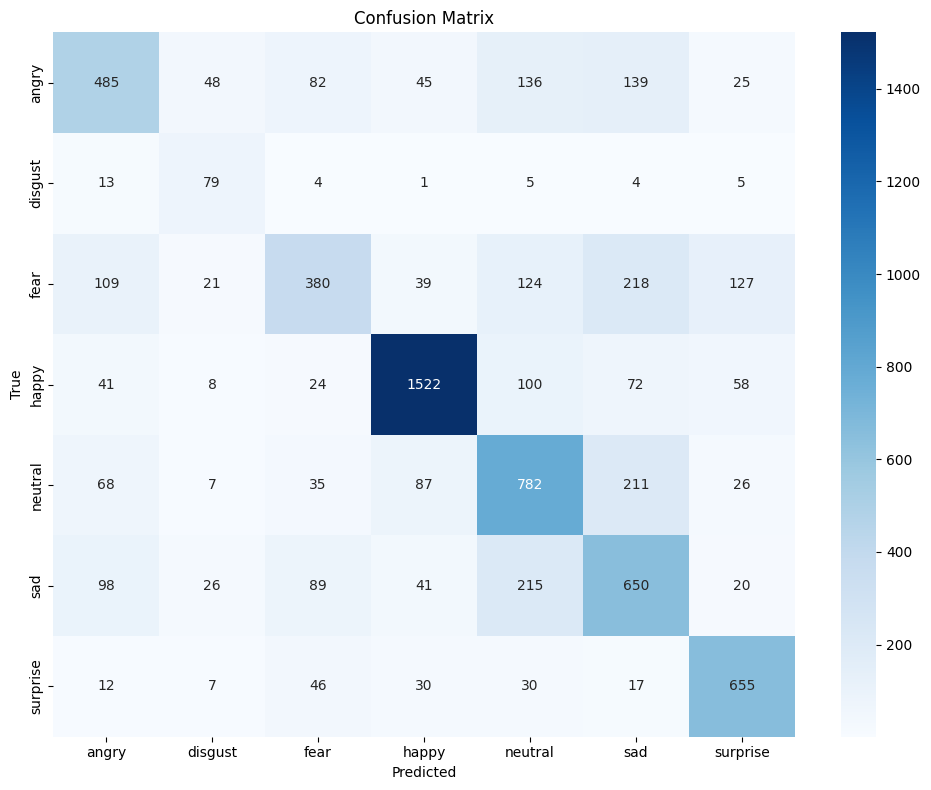

In [ ]:
# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()



1. **Loss Curves**:
   - The **train loss** and **validation loss** help you monitor whether the model is underfitting or overfitting.
   - A **decreasing train loss** and **relatively stable validation loss** indicate good model training.
   - If the **validation loss starts increasing** while train loss decreases, it may indicate overfitting.

2. **Accuracy Curves**:
   - The **train accuracy** is expected to increase consistently as the model learns from the training data.
   - The **validation accuracy** gives insight into how well the model generalizes to unseen data.
   - A gap between train and validation accuracy may indicate overfitting (training accuracy much higher than validation).

3. **Plot Customization**:
   - **Legends** are used to differentiate between the training and validation metrics.
   - **`tight_layout()`** ensures the plots don’t overlap, improving clarity.
   - **`savefig()`** allows you to save the plot for future reference or reporting.

4. **Overfitting/Underfitting Indicator**:
   - If validation loss and accuracy stagnate or degrade while training improves, it's a sign of **overfitting**.
   - If both training and validation loss and accuracy are poor, it might suggest the model is **underfitting**.

These plots are essential for monitoring model progress and ensuring it's learning effectively without overfitting.

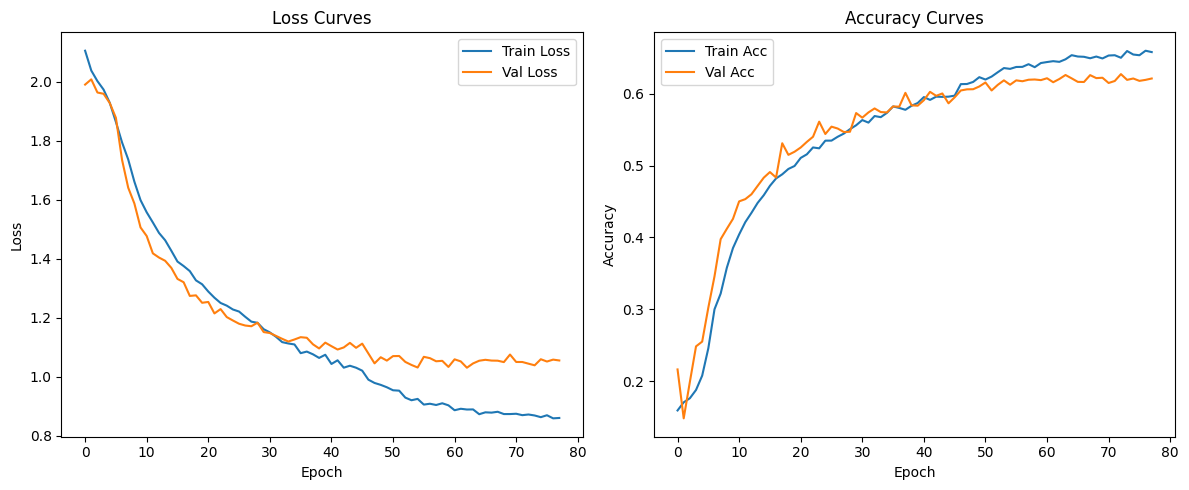

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

This code visualizes the predictions of your model on random test samples and compares the predicted labels with the true labels. Here's a concise breakdown of what it does:

### Steps:
1. **Set Model to Evaluation Mode**:
   - `model.eval()` ensures the model is in inference mode, disabling features like dropout that are only used during training.

2. **Get Random Samples**:
   - Randomly selects `num_samples` images from the test set using `torch.randperm`.
   - The images and labels are then extracted and moved to the appropriate device (GPU or CPU).

3. **Make Predictions**:
   - The model generates predictions (`outputs`), and `torch.max` selects the predicted class with the highest probability.
   
4. **Convert Tensors to Numpy Arrays**:
   - `images`, `labels`, and `predicted` are moved back to CPU and converted to numpy arrays for easy plotting.

5. **Plot the Images**:
   - Uses `matplotlib` to create a grid of images (2 rows and 5 columns).
   - Each image is displayed with the corresponding true and predicted labels.
   - If the prediction is correct, the title is shown in **green**, and if it's incorrect, it's shown in **red**.

6. **Save and Show the Plot**:
   - The resulting plot is saved as `sample_predictions.png` and displayed on the screen.

### Output:
- **Images with Predictions**: You will see 10 random test images, with their true and predicted labels.
  - Correct predictions are marked in **green**, while incorrect ones are in **red**.
- **Saved Image**: The plot is saved as `sample_predictions.png` for future reference.

This method helps to visually assess how well the model is predicting on individual test samples.


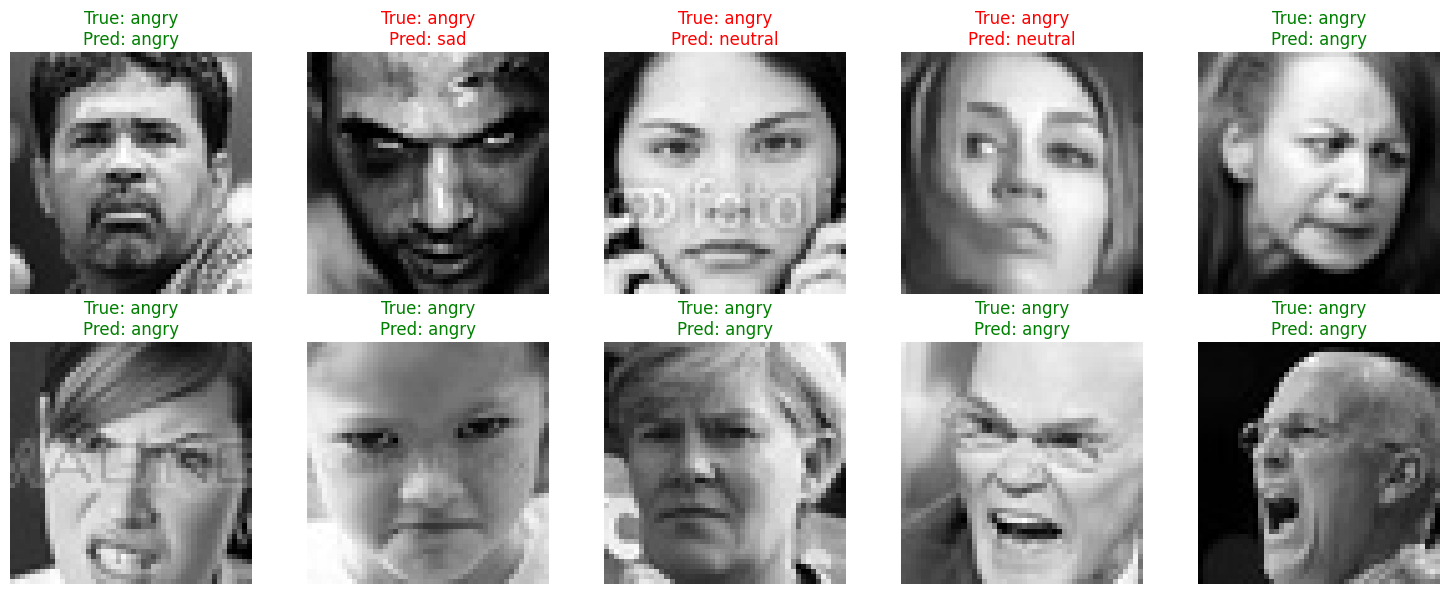

In [ ]:
#model.summary()# Visualize predictions on random test samples
def show_predictions(model, test_loader, classes, num_samples=10):
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    indices = torch.randperm(len(images))[:num_samples]
    images = images[indices]
    labels = labels[indices]

    images = images.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Convert tensors to numpy arrays
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predicted = predicted.cpu().numpy()

    # Plot images with predictions
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()

    for i in range(num_samples):
        # Convert from (C, H, W) to (H, W)
        img = images[i][0]

        # Denormalize
        img = img * 0.5 + 0.5

        # Plot
        axes[i].imshow(img, cmap='gray')
        color = 'green' if predicted[i] == labels[i] else 'red'
        axes[i].set_title(f"True: {classes[labels[i]]}\nPred: {classes[predicted[i]]}", color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    plt.show()

# Show sample predictions
show_predictions(model, test_loader, classes)

Here's a comparison chart summarizing all the models you've described:

| **Model**        | **Architecture**                | **Epochs** | **Batch Size**         | **Accuracy (%)** | **Val Loss** | **Training Data**            | **Remarks**                                      |
|------------------|----------------------------------|------------|-------------------------|------------------|--------------|------------------------------|--------------------------------------------------|
| **Model 1**       | Custom CNN (3 Conv + Dense)      | 10         | 32 (train/val)          | 51               | 1.92         | Full dataset                 | Slight overfitting; imbalanced data              |
| **Model 2**       | MobileNetV2 (with fine-tuning)   | 20 (10+10) | 32 (train/val)          | 53               | 1.23         | Full dataset                 | Used data augmentation and SGD                   |
| **Model 3**       | ResNet50                         | 40         | 4 (train) / 1 (val)     | 44               | Not given    | 500 images/class (train)     | Basic setup, smaller batch sizes                 |
| **Model 4**       | ResNet50            | 40         | 16 (train) / 8 (val)    | 47               | Not given    | 500 images/class (train)     | Higher batch size helped compared to Model 3     |
| **Model 5**       | FaceNet                          | 300        | 16 (train/val)          | 64               | 1.03    | Full dataset                 | Early stopping used, best performance so far     |

---

### Key Observations:
- **FaceNet (Model 5)** achieved the best performance (64%) using early stopping and more epochs.
- **MobileNetV2 (Model 2)** gave a slight improvement over the baseline CNN (Model 1) using fine-tuning and augmentation.
- **ResNet50 (Model 3)** underperformed due to small batch sizes and limited data.
- **Data augmentation** and **transfer learning** helped boost accuracy in Model 2.
- **Model 4** slightly outperformed Model 3 due to improved batch sizes.
- All models suffered due to **imbalanced data**.


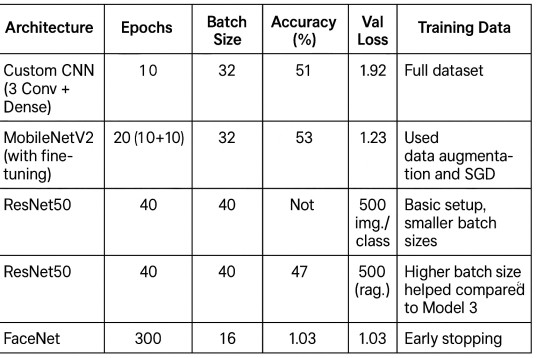